In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error
import math
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
os.getcwd()

'/Users/abir.pattnaik/Desktop'

In [28]:
os.chdir("/Users/abir.pattnaik/Desktop")

In [29]:
transaction_data=pd.read_excel('Fraud_Analytics_Dataset.xlsx',0)
customer_data=pd.read_excel('Fraud_Analytics_Dataset.xlsx',1)
sales_data=pd.read_excel('Fraud_Analytics_Dataset.xlsx',2)

In [30]:
display(transaction_data.head())
display(customer_data.head())
display(sales_data.head())

,Transaction_Id,First Time Customers.,Bigger than Average Orders.,Fast Shipping,Unusual Location.,Large quantity of Same Product .,Multiple Shipping Addresses.,Shipping and Billing Address are not the same.,Several Cards used from the Same Ip Address.,Payment Information typed with Capital letters.,Many Transactions in a short time period.
0,235360,No,No,No,No,No,No,No,No,No,No
1,234773,No,No,No,No,No,No,No,No,No,No
2,235242,No,No,No,No,No,No,No,No,No,No
3,235350,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
4,234914,No,No,No,No,No,No,No,No,No,No


,CUSTOMER_ID,LOYALTY_ID,MEMBERSHIP_TYPE__ID,MEMBERSHIP_TYPE,MEMBERSHIP_TYPE_SC,CUSTOMER_FLG,Customer_Type,customer_type_id,customer_type_sc,behavior_segment,...,BIRTH_MONTH,BIRTH_YEAR,BIRTH_QUARTER,PLACE_OF_BIRTH,COUNTRY_OF_BIRTH_SC,EVER_BANKRUPT_FLG,NO_TIMES_DELINQUENT_in_365_days,BLACKLISTED_FLG,NO_OF_DEPENDANTS,Record_created_By
0,76565665,LID877073,901.0,Gold,GLD,Y,Small/Medium Enterprise,1002.0,ENT,High Value,...,April,2004,2,Bellevue,US,N,1,N,3,\n
1,76565666,LID877029,NaN,NaN,NaN,Y,Individual,1003.0,INDV,Low Value,...,December,1984,4,Jackson,US,N,1,N,1,\n
2,76565667,LID876876,902.0,Silver,SLV,Y,Small/Medium Enterprise,1002.0,ENT,Medium Value,...,February,1999,1,Chattanooga,US,N,1,N,3,\n
3,76565668,LID876841,902.0,Silver,SLV,Y,Small/Medium Enterprise,1002.0,ENT,Low Value,...,December,1997,4,Worcester,US,N,0,N,1,\n
4,76565669,LID877001,902.0,Silver,SLV,Y,Individual,1003.0,INDV,Medium Value,...,January,1992,1,Los Angeles,US,N,1,N,1,\n


,Transaction_Id,Invoice_Id,Order_Id,Customer_Id,Mdm_Customer_Id,Loyalty_Id,Gender,Age,Membership_Id,Membership_Type,...,Cancel_Reason_Code,Cancel_Description,Return_Flag,Return_Dt,Return_Amt,Order_Returnpaid_Gross_Amt,Lastmodified_Dt,Sales_Rep_Name,Sales_Rep_Id,Fraud
0,234825,88371,88371,76565900,954421840,LID876561,FEMALE,26,904.0,Platinum,...,0,NaN,Y,2016-05-08,1953,1406,2016-04-01,NaN,\n,No
1,234666,88234,88234,76566122,965982087,NaN,MALE,22,NaN,NaN,...,0,NaN,N,2016-04-26,0,0,2016-11-14,NaN,\n,Yes
2,234823,88153,88153,76565906,953091566,LID876543,MALE,19,904.0,Platinum,...,0,NaN,N,2016-05-16,0,0,2016-08-25,John,S101\n,No
3,235342,87867,87867,76566458,924245622,LID876557,MALE,26,901.0,Gold,...,0,NaN,N,2016-05-14,0,0,2016-04-17,NaN,\n,No
4,234739,87945,87945,76566387,966653489,LID876640,MALE,37,901.0,Gold,...,0,NaN,Y,2016-05-26,1322,952,2016-07-04,John,S101\n,Yes


In [31]:
#Column Names
#transaction_data.columns
#customer_data.columns
#sales_data.columns

'''
Index([u'Transaction_Id', u'First Time Customers. ',
       u'Bigger than Average Orders. ', u'Fast Shipping ',
       u'Unusual Location. ', u'Large quantity of Same Product . ',
       u' Multiple Shipping Addresses.',
       u'Shipping and Billing Address are not the same.',
       u'Several Cards used from the Same Ip Address.',
       u'Payment Information typed with Capital letters. ',
       u'Many Transactions in a short time period. '],
      dtype='object')
'''
'''
Index([u'CUSTOMER_ID', u'LOYALTY_ID', u'MEMBERSHIP_TYPE__ID',
       u'MEMBERSHIP_TYPE', u'MEMBERSHIP_TYPE_SC', u'CUSTOMER_FLG',
       u'Customer_Type', u'customer_type_id', u'customer_type_sc',
       u'behavior_segment', u'SALUTATION', u'GENDER_ID', u'GENDER',
       u'GENDER_SC', u'BIRTH_DATE', u'AGE', u'age_at_joining', u'age_range',
       u'PLACE_OF_BITRH', u'CUSTOMER_STATUS_ID', u'CUSTOMER_STATUS_SC',
       u'CUSTOMER_STATUS', u'CUSTOMER_CREATED_DT', u'LOYALITY_FLG',
       u'DEVICE_ID', u'APP_ID', u'MARITAL_STATUS_ID', u'MARITAL_STATUS',
       u'MARITAL_STATUS_SC', u'ANNIVERSARY_DT', u'INCOME_RANGE', u'INCOME',
       u'PROFESSION', u'PROFESSION_TYPE_SC', u'PROFESSION_TYPE_ID',
       u'education', u'REGION', u'LANGUAGE', u'PREF_COMM_LANG_ID',
       u'PREF_COMM_LANG', u'PREF_COMM_LANG_SC', u'PREF_ADDR',
       u'Residence_Address_Line_1', u'Residence_Address_Line_2',
       u'Residence_Address_Line_3', u'Residence_City', u'Residence_Province',
       u'Residence_Country', u'Residence_Zip_CD', u'Residence_phone',
       u'residence_fax_number', u'Office_Address_Line_1',
       u'Office_Address_Line_2', u'Office_Address_Line_3', u'Office_City',
       u'OFFICE_PROVIENCE', u'OFFICE_COUNTRY', u'OFFICE__ZIP_CD',
       u'OFFICE_PHONE_NO', u'office_fax_number', u'Preferred_email_ID',
       u'Preferred_Comm_Channel', u'Preferred_Comm_Sub_Channel',
       u'Preferred_Comm_Sub_Channel_SC', u'PREF_CONTACT_TIME',
       u'Acquistion_Channel_ID', u'Acquistion_Channel_SC',
       u'Acquistion_Channel_Description', u'acquisition_subchannel_id',
       u'acquisition_subchannel_type_sc', u'acquisition_subchannel',
       u'INFLUENCE', u'fbck_user_FLG', u'fbck_following_CNT',
       u'fbck_follower_CNT', u'twt_user_FLG', u'twt_follower_CNT',
       u'twt_following_CNT', u'Interests_1', u'Interest_2', u'Friends_Count',
       u'credit_risk_score', u'credit_risk_rating', u'DRIVING_LICENSE_NO',
       u'BIRTH_MONTH', u'BIRTH_YEAR', u'BIRTH_QUARTER', u'PLACE_OF_BIRTH',
       u'COUNTRY_OF_BIRTH_SC', u'EVER_BANKRUPT_FLG',
       u'NO_TIMES_DELINQUENT_in_365_days', u'BLACKLISTED_FLG',
       u'NO_OF_DEPENDANTS', u'Record_created_By'],
      dtype='object')
'''

'''
Index([u'Transaction_Id', u'Invoice_Id', u'Order_Id', u'Customer_Id',
       u'Mdm_Customer_Id', u'Loyalty_Id', u'Gender', u'Age', u'Membership_Id',
       u'Membership_Type', u'Membership_SC', u'Product_Id', u'Channel_Id',
       u'Sub_Channel_Id', u'Brand_Cd', u'Gender_Age_Id', u'Size_Id',
       u'Color_Id', u'Campaign_Id', u'Campaign_Desc', u'Store_Id',
       u'Store_Short_Code', u'Store_Description', u'Sale_Dt', u'City',
       u'City_Id', u'City_Sc', u'Country_Id', u'Country_Sc', u'Country',
       u'Business_Week', u'Day', u'No_Of_Items', u'Shipment_Flg',
       u'Order_Item_Paidprice_Gross_Amt_', u'Order_Item_Listprice_Gross_Amt_',
       u'Currency', u'Discount_Percentage', u'Discount_Amt',
       u'Mode_Of_Payment', u'Quantity_Returned', u'No_Of_Items_After_Return',
       u'Cancel_Date', u'Expiry_Date', u'Cancel_Reason_Code',
       u'Cancel_Description', u'Return_Flag', u'Return_Dt', u'Return_Amt',
       u'Order_Returnpaid_Gross_Amt', u'Lastmodified_Dt', u'Sales_Rep_Name',
       u'Sales_Rep_Id', u'Fraud'],
      dtype='object')
'''


"\nIndex([u'Transaction_Id', u'Invoice_Id', u'Order_Id', u'Customer_Id',\n       u'Mdm_Customer_Id', u'Loyalty_Id', u'Gender', u'Age', u'Membership_Id',\n       u'Membership_Type', u'Membership_SC', u'Product_Id', u'Channel_Id',\n       u'Sub_Channel_Id', u'Brand_Cd', u'Gender_Age_Id', u'Size_Id',\n       u'Color_Id', u'Campaign_Id', u'Campaign_Desc', u'Store_Id',\n       u'Store_Short_Code', u'Store_Description', u'Sale_Dt', u'City',\n       u'City_Id', u'City_Sc', u'Country_Id', u'Country_Sc', u'Country',\n       u'Business_Week', u'Day', u'No_Of_Items', u'Shipment_Flg',\n       u'Order_Item_Paidprice_Gross_Amt_', u'Order_Item_Listprice_Gross_Amt_',\n       u'Currency', u'Discount_Percentage', u'Discount_Amt',\n       u'Mode_Of_Payment', u'Quantity_Returned', u'No_Of_Items_After_Return',\n       u'Cancel_Date', u'Expiry_Date', u'Cancel_Reason_Code',\n       u'Cancel_Description', u'Return_Flag', u'Return_Dt', u'Return_Amt',\n       u'Order_Returnpaid_Gross_Amt', u'Lastmodified_Dt', u

In [32]:
###Converting transaction_data columns into binary columns

for col_name in transaction_data.columns:
    if(transaction_data[col_name].dtype == 'object'):
        transaction_data[col_name]= transaction_data[col_name].astype('category')
        transaction_data[col_name] = transaction_data[col_name].cat.codes
        
#replacing the colums name
transaction_data.columns = transaction_data.columns.str.replace(' ','')
transaction_data.columns = transaction_data.columns.str.replace('.','')

In [33]:
##Looking out for null values
null_data = customer_data[customer_data.isnull().any(axis=1)]
display(null_data)

,CUSTOMER_ID,LOYALTY_ID,MEMBERSHIP_TYPE__ID,MEMBERSHIP_TYPE,MEMBERSHIP_TYPE_SC,CUSTOMER_FLG,Customer_Type,customer_type_id,customer_type_sc,behavior_segment,...,BIRTH_MONTH,BIRTH_YEAR,BIRTH_QUARTER,PLACE_OF_BIRTH,COUNTRY_OF_BIRTH_SC,EVER_BANKRUPT_FLG,NO_TIMES_DELINQUENT_in_365_days,BLACKLISTED_FLG,NO_OF_DEPENDANTS,Record_created_By
0,76565665,LID877073,901.0,Gold,GLD,Y,Small/Medium Enterprise,1002.0,ENT,High Value,...,April,2004,2,Bellevue,US,N,1,N,3,\n
1,76565666,LID877029,NaN,NaN,NaN,Y,Individual,1003.0,INDV,Low Value,...,December,1984,4,Jackson,US,N,1,N,1,\n
4,76565669,LID877001,902.0,Silver,SLV,Y,Individual,1003.0,INDV,Medium Value,...,January,1992,1,Los Angeles,US,N,1,N,1,\n
5,76565670,LID877275,901.0,Gold,GLD,Y,Individual,1003.0,INDV,High Value,...,February,2004,1,Fremont,US,N,0,N,2,\n
6,76565671,LID876961,NaN,NaN,NaN,Y,Individual,1003.0,INDV,Low Value,...,July,1986,3,Scottsdale,US,N,0,N,1,\n
7,76565672,LID877158,903.0,Bronze,BRZ,Y,Individual,1003.0,INDV,High Value,...,April,1989,2,Santa Ana,US,N,0,N,2,\n
10,76565675,LID876903,NaN,NaN,NaN,Y,Individual,1003.0,INDV,Medium Value,...,July,1993,3,Chattanooga,US,N,1,N,3,\n
13,76565678,LID877395,NaN,NaN,NaN,Y,Small/Medium Enterprise,1002.0,ENT,Low Value,...,September,1985,3,Stamford,US,N,1,N,3,\n
14,76565679,LID877184,903.0,Bronze,BRZ,Y,Small/Medium Enterprise,1002.0,ENT,Medium Value,...,November,1993,4,Charlotte,US,N,1,N,2,\n
15,76565680,LID876955,NaN,NaN,NaN,Y,Small/Medium Enterprise,1002.0,ENT,Medium Value,...,December,1986,4,Norfolk,US,N,1,N,1,\n


In [34]:
'''
Joining all the 3 sheets
'''
#caller.join(other.set_index('key'), on='key')
f1=sales_data.join(transaction_data.set_index('Transaction_Id'),on='Transaction_Id')
master_data = f1.join(customer_data.set_index('CUSTOMER_ID'),on='Customer_Id')




In [35]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Columns: 157 entries, Transaction_Id to Record_created_By
dtypes: datetime64[ns](3), float64(13), int64(39), int8(10), object(92)
memory usage: 1.1+ MB


In [36]:
display(master_data.head())

,Transaction_Id,Invoice_Id,Order_Id,Customer_Id,Mdm_Customer_Id,Loyalty_Id,Gender,Age,Membership_Id,Membership_Type,...,BIRTH_MONTH,BIRTH_YEAR,BIRTH_QUARTER,PLACE_OF_BIRTH,COUNTRY_OF_BIRTH_SC,EVER_BANKRUPT_FLG,NO_TIMES_DELINQUENT_in_365_days,BLACKLISTED_FLG,NO_OF_DEPENDANTS,Record_created_By
0,234825,88371,88371,76565900,954421840,LID876561,FEMALE,26,904.0,Platinum,...,July,1984,3,Miami,US,N,1,N,3,\n
1,234666,88234,88234,76566122,965982087,NaN,MALE,22,NaN,NaN,...,June,1984,2,Newark,US,N,0,N,1,\n
2,234823,88153,88153,76565906,953091566,LID876543,MALE,19,904.0,Platinum,...,June,1986,2,Anchorage,US,N,1,N,3,\n
3,235342,87867,87867,76566458,924245622,LID876557,MALE,26,901.0,Gold,...,January,1991,1,Anchorage,US,N,1,N,3,\n
4,234739,87945,87945,76566387,966653489,LID876640,MALE,37,901.0,Gold,...,July,1977,3,Columbia,US,N,1,N,3,\n


In [37]:
'''
Removing the following columns as these are redundant columns and won't help in our analysis .
'''
column_list_removal=['City','City_Id','MEMBERSHIP_TYPE__ID','MEMBERSHIP_TYPE','Customer_Type','customer_type_id','SALUTATION','GENDER_ID','GENDER_SC','CUSTOMER_STATUS_ID','CUSTOMER_STATUS','CUSTOMER_CREATED_DT','DEVICE_ID','APP_ID','MARITAL_STATUS_ID','MARITAL_STATUS','ANNIVERSARY_DT','INCOME_RANGE','PROFESSION','PROFESSION_TYPE_ID','PREF_COMM_LANG_ID','PREF_COMM_LANG','Residence_Country','Preferred_Comm_Sub_Channel','Acquistion_Channel_ID','Acquistion_Channel_Description','acquisition_subchannel_id','acquisition_subchannel','COUNTRY_OF_BIRTH_SC','Membership_Id','Membership_Type','Campaign_Desc','Store_Id','Store_Description','Country_Id','Country','Currency','Cancel_Description','Sales_Rep_Id']

# dividing test and train data 
for column_name in column_list_removal:
    master_data=master_data.drop(column_name,axis=1)

In [38]:
master_data.info()
len(column_list_removal)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Columns: 118 entries, Transaction_Id to Record_created_By
dtypes: datetime64[ns](3), float64(3), int64(36), int8(10), object(66)
memory usage: 808.3+ KB


39

In [41]:
for col_name in master_data.columns:
    master_data[col_name].dtype == 'object'
    print(col_name)

Transaction_Id
Invoice_Id
Order_Id
Customer_Id
Mdm_Customer_Id
Loyalty_Id
Gender
Age
Membership_SC
Product_Id
Channel_Id
Sub_Channel_Id
Brand_Cd
Gender_Age_Id
Size_Id
Color_Id
Campaign_Id
Store_Short_Code
Sale_Dt
City_Sc
Country_Sc
Business_Week
Day
No_Of_Items
Shipment_Flg
Order_Item_Paidprice_Gross_Amt_
Order_Item_Listprice_Gross_Amt_
Discount_Percentage
Discount_Amt
Mode_Of_Payment
Quantity_Returned
No_Of_Items_After_Return
Cancel_Date
Expiry_Date
Cancel_Reason_Code
Return_Flag
Return_Dt
Return_Amt
Order_Returnpaid_Gross_Amt
Lastmodified_Dt
Sales_Rep_Name
Fraud
FirstTimeCustomers
BiggerthanAverageOrders
FastShipping
UnusualLocation
LargequantityofSameProduct
MultipleShippingAddresses
ShippingandBillingAddressarenotthesame
SeveralCardsusedfromtheSameIpAddress
PaymentInformationtypedwithCapitalletters
ManyTransactionsinashorttimeperiod
LOYALTY_ID
MEMBERSHIP_TYPE_SC
CUSTOMER_FLG
customer_type_sc
behavior_segment
GENDER
BIRTH_DATE
AGE
age_at_joining
age_range
PLACE_OF_BITRH
CUSTOMER_STA

In [42]:
#Converting data type to int
convert_to_int=['Transaction_Id','Invoice_Id','Order_Id','Customer_Id','Age','Product_Id','Business_Week','No_Of_Items',
                'Order_Item_Paidprice_Gross_Amt_','Order_Item_Listprice_Gross_Amt_','Discount_Percentage',
                'Discount_Amt','Quantity_Returned','No_Of_Items_After_Return','Return_Amt','Order_Returnpaid_Gross_Amt',
                'INCOME','Residence_Zip_CD','fbck_following_CNT','fbck_follower_CNT','twt_follower_CNT','twt_following_CNT','Friends_Count','credit_risk_score','BIRTH_QUARTER','BIRTH_YEAR']



convert_to_string=['Loyalty_Id','City','LOYALTY_ID','Residence_Address_Line_1','Residence_Address_Line_2','Residence_Address_Line_3','Residence_City','Residence_Province','Residence_phone','residence_fax_number','Office_Address_Line_1','Office_Address_Line_2','Office_Address_Line_3','Office_City','OFFICE_PROVIENCE','OFFICE_COUNTRY','OFFICE__ZIP_CD','OFFICE_PHONE_NO','Preferred_email_ID','Interests_1','Interest_2','DRIVING_LICENSE_NO','BIRTH_MONTH']



ordinals=['Membership_SC','Sub_Channel_Id','Brand_Cd','Gender_Age_Id','Size_Id','Color_Id','Campaign_Id','Store_Short_Code','City_Sc','Country_Sc','Mode_Of_Payment','Cancel_Reason_Code','Sales_Rep_Name','PROFESSION_TYPE_SC','education','REGION','LANGUAGE','MARITAL_STATUS_SC','Preferred_Comm_Channel','Preferred_Comm_Sub_Channel_SC','PREF_CONTACT_TIME','Acquistion_Channel_SC','acquisition_subchannel_type_sc','INFLUENCE','credit_risk_rating']



binary_category=['Gender','Channel_Id','Shipment_Flg','Return_Flag','Fraud','FirstTimeCustomers','BiggerthanAverageOrders','FastShipping','UnusualLocation','LargequantityofSameProduct',
'MultipleShippingAddresses','ShippingandBillingAddressarenotthesame',
'SeveralCardsusedfromtheSameIpAddress','SeveralCardsusedfromtheSameIpAddress','PaymentInformationtypedwithCapitalletters','ManyTransactionsinashorttimeperiod','PREF_COMM_LANG_SC',
'PREF_ADDR','fbck_user_FLG','twt_user_FLG','EVER_BANKRUPT_FLG','NO_TIMES_DELINQUENT_in_365_days','BLACKLISTED_FLG']

#Record_created_BY<--REMOVE THIS COLUMN





to_date=['Sale_Dt','Cancel_Date','Expiry_Date','Return_Dt','Lastmodified_Dt']


#master_data['Transaction_Id'].astype('int')
#master_data['Transaction_Id'].dtype
#

for column_name in master_data.columns:
    print(column_name)

Transaction_Id
Invoice_Id
Order_Id
Customer_Id
Mdm_Customer_Id
Loyalty_Id
Gender
Age
Membership_SC
Product_Id
Channel_Id
Sub_Channel_Id
Brand_Cd
Gender_Age_Id
Size_Id
Color_Id
Campaign_Id
Store_Short_Code
Sale_Dt
City_Sc
Country_Sc
Business_Week
Day
No_Of_Items
Shipment_Flg
Order_Item_Paidprice_Gross_Amt_
Order_Item_Listprice_Gross_Amt_
Discount_Percentage
Discount_Amt
Mode_Of_Payment
Quantity_Returned
No_Of_Items_After_Return
Cancel_Date
Expiry_Date
Cancel_Reason_Code
Return_Flag
Return_Dt
Return_Amt
Order_Returnpaid_Gross_Amt
Lastmodified_Dt
Sales_Rep_Name
Fraud
FirstTimeCustomers
BiggerthanAverageOrders
FastShipping
UnusualLocation
LargequantityofSameProduct
MultipleShippingAddresses
ShippingandBillingAddressarenotthesame
SeveralCardsusedfromtheSameIpAddress
PaymentInformationtypedwithCapitalletters
ManyTransactionsinashorttimeperiod
LOYALTY_ID
MEMBERSHIP_TYPE_SC
CUSTOMER_FLG
customer_type_sc
behavior_segment
GENDER
BIRTH_DATE
AGE
age_at_joining
age_range
PLACE_OF_BITRH
CUSTOMER_STA

In [43]:
for binary_cat in binary_category:
    master_data[binary_cat]=master_data[binary_cat].astype('category')
    master_data[binary_cat]=master_data[binary_cat].cat.codes

In [47]:
#print(master_data.X.describe())

In [24]:
#for binary_cat in ordinals:
#    master_data[binary_cat]=master_data[binary_cat].astype('category')
#    master_data[binary_cat]=master_data[binary_cat].cat.codes
    
    
variables_to_be_removed=['Order_Id','Customer_Id','Mdm_Customer_Id','Gender','Gender_Age_Id','Brand_Cd','Size_Id','Color_Id','Sale_Dt','Country_Sc','Discount_Percentage','Discount_Amt','No_Of_Items_After_Return','Cancel_Date','Expiry_Date','Return_Dt','Lastmodified_Dt','Sales_Rep_Name','GENDER','BIRTH_DATE','AGE','PLACE_OF_BITRH','MARITAL_STATUS_SC','REGION','Residence_Address_Line_1','Residence_Address_Line_2','Residence_Address_Line_3','Residence_City','Residence_Province','Residence_Zip_CD','Residence_phone','residence_fax_number','Office_Address_Line_1','Office_Address_Line_2','Office_Address_Line_3','Office_City','OFFICE_PROVIENCE','OFFICE_COUNTRY','OFFICE__ZIP_CD','OFFICE_PHONE_NO','office_fax_number','Preferred_email_ID','Acquistion_Channel_SC','acquisition_subchannel_type_sc','fbck_following_CNT','fbck_follower_CNT','twt_follower_CNT','twt_following_CNT','Interests_1','Interest_2','Friends_Count','DRIVING_LICENSE_NO','BIRTH_MONTH','BIRTH_YEAR','BIRTH_QUARTER','PLACE_OF_BIRTH','EVER_BANKRUPT_FLG','BLACKLISTED_FLG','Record_created_By','NO_OF_DEPENDANTS']

In [45]:
for column_name in variables_to_be_removed:
    master_data=master_data.drop(column_name,axis=1)

In [46]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 58 columns):
Transaction_Id                               947 non-null int64
Invoice_Id                                   947 non-null int64
Loyalty_Id                                   775 non-null object
Age                                          947 non-null int64
Membership_SC                                775 non-null object
Product_Id                                   947 non-null int64
Channel_Id                                   947 non-null int8
Sub_Channel_Id                               947 non-null int64
Campaign_Id                                  947 non-null int64
Store_Short_Code                             193 non-null object
City_Sc                                      947 non-null object
Business_Week                                947 non-null int64
Day                                          947 non-null int64
No_Of_Items                                  947 non-null in

In [51]:
###Performing stratified shuffle split on the data
y=range(947)
X_train, X_test, y_train, y_test = train_test_split(master_data, y, test_size=0.3, random_state=42)

In [84]:
##Converting variables to int
##taking only few variables
subset_data=X_train[['Business_Week','No_Of_Items','Shipment_Flg','Order_Item_Paidprice_Gross_Amt_','Order_Item_Listprice_Gross_Amt_','Quantity_Returned','Return_Flag','Return_Amt','Order_Returnpaid_Gross_Amt','FirstTimeCustomers','BiggerthanAverageOrders','ShippingandBillingAddressarenotthesame','SeveralCardsusedfromtheSameIpAddress','PaymentInformationtypedwithCapitalletters','ManyTransactionsinashorttimeperiod','age_at_joining','PREF_ADDR','credit_risk_score']]

In [85]:
gnb = GaussianNB()
#predicted_variable=X_train.Fraud
#X_train=X_train.drop('Fraud',axis=1)
y_pred = gnb.fit(subset_data, predicted_variable).predict(subset_data)



In [86]:
print accuracy_score(predicted_variable, y_pred)
#print precision_recall_fscore_support(predicted_variable, y_pred, average='macro')
print precision_recall_fscore_support(predicted_variable, y_pred, average='micro')
print precision_recall_fscore_support(predicted_variable, y_pred, average=None)
#print precision_recall_fscore_support(predicted_variable, y_pred, average='weighted')

print math.sqrt(mean_squared_error(predicted_variable, y_pred))


0.824773413897281
(0.824773413897281, 0.824773413897281, 0.824773413897281, None)
(array([0.89      , 0.19354839]), array([0.91438356, 0.15384615]), array([0.90202703, 0.17142857]), array([584,  78]))
0.418600747853


In [87]:
kfold = model_selection.KFold(n_splits=10, random_state=48)
#model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(gnb, subset_data, predicted_variable, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())


scoring = 'neg_log_loss'
results = model_selection.cross_val_score(gnb, subset_data, predicted_variable, cv=kfold, scoring=scoring)
print("neg_log_loss: %.3f (%.3f)") % (results.mean(), results.std())

scoring = 'roc_auc'
results = model_selection.cross_val_score(gnb, subset_data, predicted_variable, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)") % (results.mean(), results.std())

matrix = confusion_matrix(predicted_variable, y_pred)
print(matrix)

report = classification_report(predicted_variable, y_pred)
print(report)



Accuracy: 0.808 (0.050)
neg_log_loss: -0.642 (0.149)
AUC: 0.554 (0.146)
[[534  50]
 [ 66  12]]
             precision    recall  f1-score   support

          0       0.89      0.91      0.90       584
          1       0.19      0.15      0.17        78

avg / total       0.81      0.82      0.82       662



In [83]:
null_data = subset_data[subset_data.isnull().any(axis=1)]
display(null_data)

,Business_Week,No_Of_Items,Shipment_Flg,Order_Item_Paidprice_Gross_Amt_,Order_Item_Listprice_Gross_Amt_,Quantity_Returned,Return_Flag,Return_Amt,Order_Returnpaid_Gross_Amt,FirstTimeCustomers,BiggerthanAverageOrders,ShippingandBillingAddressarenotthesame,SeveralCardsusedfromtheSameIpAddress,PaymentInformationtypedwithCapitalletters,ManyTransactionsinashorttimeperiod,ManyTransactionsinashorttimeperiod,age_at_joining,PREF_ADDR,credit_risk_score


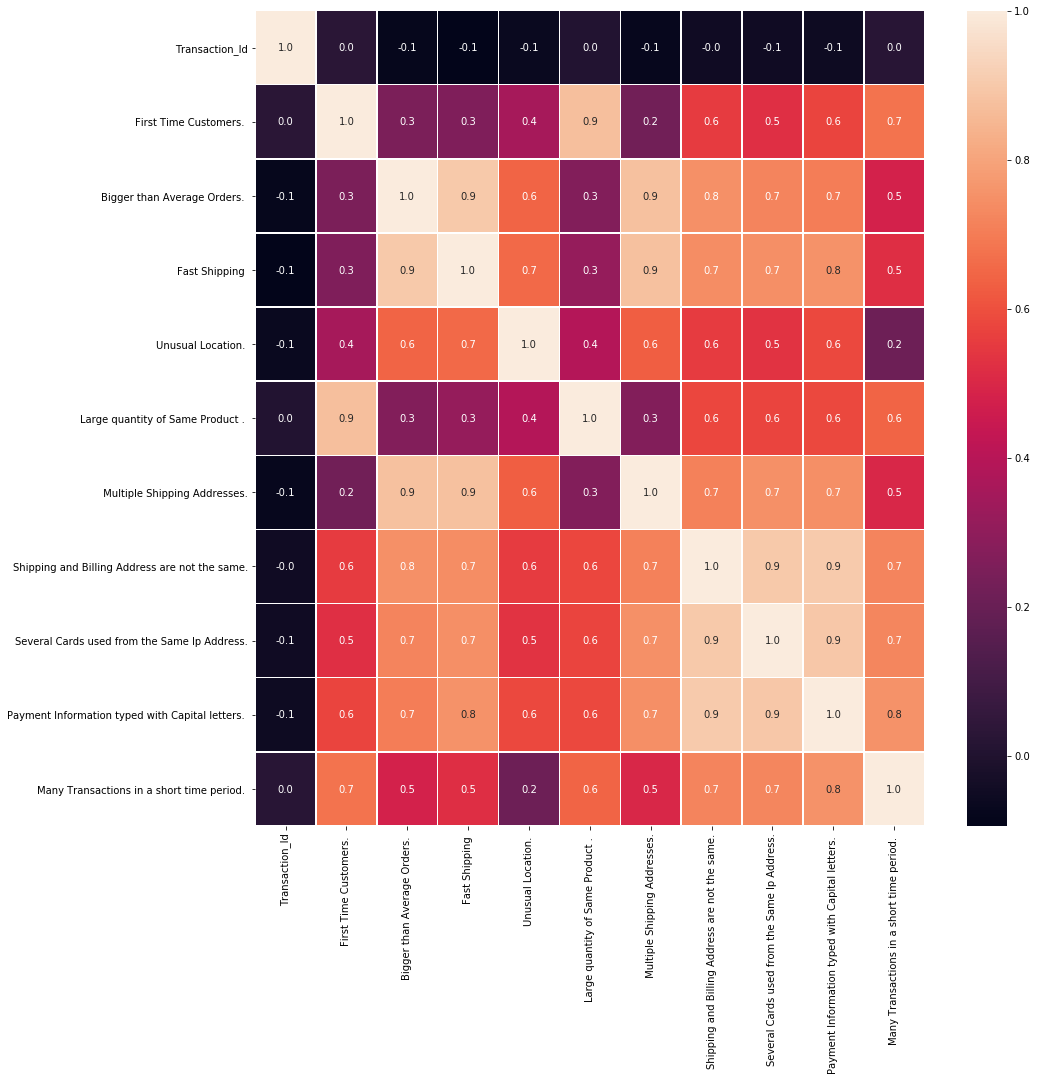

In [80]:
f,ax=plt.subplots(figsize=(15, 15))
sns.heatmap(data=transaction_data.corr(),annot=True,linewidths=.5,fmt= '.1f',ax=ax)
plt.show()

In [ ]:
train_test_split

1. Feature Listing
2. Feature Engineering
3. Select K Best
4. Grid Search CV
5. Model Building